# Working with Text Data(テキストデータの操作)

第4章では、データの特性を表すことができる2種類の特徴について話しました：  
量を表す連続特徴と、固定リストの項目であるカテゴリ特徴です。  
3番目の種類の特徴は、多くのアプリケーションで見られるテキストです。  
例えば、ある電子メールメッセージを正規の電子メールかスパムかに分類したい場合、電子メールの内容は、この分類作業のための重要な情報を含んでいることは間違いありません。  
あるいは、ある政治家の移民に関する意見を知りたいとします。ここでは、その個人の演説やツイートが有用な情報を提供してくれるかもしれません。  
カスタマーサービスでは、メッセージが苦情なのか問い合わせなのかを知りたいことがよくあります。  
メッセージの件名や内容から顧客の意図を自動的に判断することで、適切な部署にメッセージを送信したり、完全自動の返信を送信したりすることができます。



テキストデータは通常、文字からなる文字列で表現されます。  
先ほどの例では、テキストデータの長さは様々です。  
この特徴は、これまで説明してきた数値特徴とは明らかに異なり、機械学習アルゴリズムを適用する前にデータを処理する必要があります。

## Types of Data Represented as Strings(文字列として表されるデータの種類)

機械学習のためにテキストデータを表現する処理ステップに入る前に、遭遇する可能性のあるさまざまな種類のテキストデータについて簡単に説明したいと思います。  
テキストは通常、データセットの中では単なる文字列ですが、すべての文字列特徴をテキストとして扱うべきではありません。  
第5章(Model Evalutio  and Improvement)で説明したように、文字列特徴は時としてカテゴリカルな変数を表すことがあります。  
データを見る前に文字列特徴量をどのように扱うかを知る方法はありません。  

表示される可能性のある文字列データには、次の4種類があります。  
- カテゴリカルデータ
- 意味的にカテゴリにマッピングできる自由な文字列
- 構造化文字列データ
- テキストデータ

カテゴリカルデータとは、固定されたリストから得られるデータのことです。  
例えば、アンケートで好きな色を聞いて、ドロップダウンメニューから "赤"、"緑"、"青"、"黄"、"黒"、"白"、"紫"、"ピンク "の中から選択できるようにしてデータを収集したとします。  

これにより、8つの異なる値を持つデータセットが作成されます。  
これがあなたのデータに当てはまるかどうかは、データを目で見て確認することができます  
（非常に多くの異なる文字列が見られる場合は、これがカテゴリ変数である可能性は低いと思われます）。  

また、各変数が実際にあなたのアプリケーションにとって意味のあるカテゴリに対応しているかどうかを確認したいかもしれません。  

アンケートが存在する途中で、誰かが「黒」が「blak」とスペルミスしていることに気付き、その後アンケートを修正したとします。  
その結果、あなたのデータセットには「blak」と「black」の両方が含まれており、これらは同じ意味に対応しているので、統合されるべきです。

ここで、ドロップダウンメニューの代わりに、ユーザーが好きな色を入力できるテキストフィールドを用意することを想像してみてください。  
多くの人が "黒 "や "青 "のような色名で答えるかもしれません。  

他にも、誤字脱字をしたり、"グレー "と "グレー "のような綴りを使い分けたり、"ミッドナイトブルー "のような、より喚起的で具体的な名前を使う人もいるかもしれません。  
また、非常に奇妙なエントリもあるでしょう。  

いくつかの良い例としては、人々は色に名前を付けなければなず、"velociraptor cloaka" や "my dentist's office orange" のような名前を思いついたxkcd Color Survey から来ています。  
私はまだ彼のフケがゆっくりと私のガバッとしたヨーに漂っていたのを覚えていす」というように、自動的に色にマッピングするのは難しいですが（あるいは全くできません）。

テキストフィールドから得られる応答は、リストの2番目のカテゴリ、意味的にカテゴリにマッピングできる自由な文字列に属します。  
このデータをカテゴリ変数としてエンコードするのがベストでしょう。  

この場合、最も一般的なエントリを使用するか、アプリケーションにとって意味のある方法で回答を取得するカテゴリを定義することでカテゴリを選択できます。  
そして、標準的な色のためのいくつかのカテゴリ、「緑と赤のストライプ」のような回答をした人のための「multicolored」カテゴリ、そして、そうでなければエンコードできないもののための「other」カテゴリを持つことができるかもしれません。  
このような文字列の前処理には多くの手作業が必要で、簡単には自動化できません。データ収集に影響を与えることができる立場にある場合は、カテゴリカル変数を使用した方がよりよく捕らえられる概念のために、手動で入力した値を避けることを強くお勧めします。

多くの場合、手動で入力された値は固定されたカテゴリには対応していませんが、住所、地名や人名、日付、電話番号、その他の識別子のように、何らかの基礎となる構造を持っています。  
この種の文字列は解析が非常に困難な場合が多く、その処理はコンテキストやドメインに大きく依存します。  
これらのケースを体系的に扱うことは本書の範囲を超えています。

文字列データの最後のカテゴリは、フレーズや文章で構成される自由形式のテキストデータです。例としては、ツイート、チャットログ、ホテルのレビュー、シェイクスピアのコレクション、Wikipediaのコンテンツ、Project Gutenbergの5万冊の電子書籍のコレクションなどが挙げられます。これらのコレクションはすべて、ほとんどが単語からなる文章として情報を含んでいます$^1$。簡単にするために、すべての文書が英語で書かれているとしましょう$^2$。テキスト分析の文脈では、データセットをコーパスと呼び、1つのテキストとして表現された各データポイントを文書と呼ぶことが多い。これらの用語は、情報検索（IR）と自然言語処理（NLP）のコミュニティから来ており、どちらも主にテキストデータを扱っています。    

> 
1: 間違いなく、ツイートにリンクされているWebサイトのコンテンツには、ツイート自体のテキストよりも多くの情報が含まれています。  

2: この章の残りの部分で説明する内容のほとんどは、ローマ字を使用する他の言語にも適用され、一部は単語境界区切り文字を使用する他の言語にも適用されます。たとえば、中国語は単語の境界を区切ることはなく、この章の手法を適用することを困難にする他の課題があります。

## Example Application: Sentiment Analysis of Movie Reviews
**アプリケーション例：映画レビューの感情分析**   

この章の実行例として、スタンフォード大学の研究者Andrew Maasによって収集されたIMDb（Internet Movie Database）Webサイトからの映画レビューのデータセットを使用します$^3$。  

このデータセットには、レビューのテキストと、レビューが「ポジティブ」か「ネガティブ」かを示すラベルが含まれています。  
IMDb Webサイト自体には、1から10までの評価が含まれています。  
モデリングを簡素化するために、この注釈は2クラスの分類データセットとして要約され、スコアが7以上のレビューはポジティブとしてラベル付けされ、スコア4以下はネガティブとしてラベル付けされます（ニュートラルレビューはデータセットに含まれません）。  
これがデータの適切な表現であるかどうかの質問はオープンのままにし、AndrewMaasによって提供されたデータを単純に使用します。  
OS XまたはLinuxを使用している場合は、次を使用してデータをダウンロードおよび解凍できます$^4$。

> 3: データセットはhttp://ai.stanford.edu/~amaas/data/sentiment/で入手できます。  
4: 「！」コマンドラインでコマンドを実行することを示します。ここでは、OSXとLinuxのコマンドライン構文を使用しています。  
Windowsでは、ブラウザーを使用してファイルをダウンロードし、エクスプローラーを使用して解凍してフォルダーを削除できます。


In [ ]:
# ! wget -nc http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
# ! tar xzf data/aclImdb_v1.tar.gz --skip-old-files -C data

File ‘data/aclImdb_v1.tar.gz’ already there; not retrieving.



In [1]:
# !tree -dL 2 data/aclImdb

/usr/bin/sh: 1: tree: not found


posフォルダーには、すべての肯定的なレビューが含まれ、それぞれが個別のテキストファイルとして、negフォルダーについても同様です。  
unsupフォルダーには、ラベルのないデータが含まれていますが、これらは使用しないため、以下を削除します。

In [2]:
# !rm -r data/aclImdb/train/unsup

scikit-learnには、このようなフォルダー構造に格納されているファイルをロードするためのヘルパー関数があります。  
各サブフォルダーは、load_filesと呼ばれるラベルに対応しています。最初にload_files関数をトレーニングデータに適用します。

In [2]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")

# load_filesは、トレーニングテキストとトレーニングラベルを含む束を返します
text_train, y_train, = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[6]:\n{}".format(text_train[6]))

type of text_train: <class 'list'>
length of text_train: 25000
text_train[6]:
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


text_trainは長さ25,000のリストであり、各エントリはレビューを含む文字列であることがわかります。  
レビューをインデックス1で印刷しました。  
レビューにHTMLの改行が含まれていることもわかります（<br/>）。  
これらが機械学習モデルに大きな影響を与える可能性は低いですが、先に進む前にデータをクリーンアップしてこのフォーマットを削除することをお勧めします。

In [3]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

text_trainのエントリのタイプは、Pythonのバージョンによって異なります。  
Python 3では、文字列データのバイナリエンコーディングを表すバイトタイプになります。  
Python 2では、text_trainに文字列が含まれています。  
ここではPythonのさまざまな文字列タイプの詳細については説明しませんが、文字列とUnicodeに関するPython2またはPython3のドキュメントを読むことをお勧めします。  

データセットは、正のクラスと負のクラスのバランスが取れるように収集されたため、負の文字列と同じ数の正の文字列があります。

In [4]:
import numpy as np 
print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [12500 12500]


同じ方法でテストデータセットをロードします。

In [5]:
from sklearn.datasets import load_files
import numpy as np
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of dcuments in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of dcuments in test data: 25000
Samples per class (test): [12500 12500]


解決したいタスクは次のとおりです。レビューが与えられた場合、レビューのテキストコンテンツに基づいて「positive」または「ngetive」というラベルを割り当てます。  
これは標準的な二項分類タスクです。  
ただし、テキストデータは、機械学習モデルが処理できる形式ではありません。  
テキストの文字列表現を、機械学習アルゴリズムを適用できる数値表現に変換する必要があります。

## Representing Text Data as a Bag of Words(テキストデータを単語の袋として表現する)

機械学習用のテキストを表現するための最もシンプルで効果的で一般的に使用される方法の1つは、bag-of-words表現を使用することです。  
この表現を使用する場合、章、段落、文、書式設定など、入力テキストの構造のほとんどを破棄し、コーパスの各テキストに各単語が出現する頻度のみをカウントします。  
構造を破棄し、単語の出現のみを数えることは、テキストを「bag(バッグ)」として表すという精神的なイメージにつながります。

ドキュメントのコーパスのbag-of-words表現の計算は、次の3つのステップで構成されます。  
- トークン化。各ドキュメントを、たとえば空白と句読点で分割するなどして、ドキュメントに表示される単語（トークンと呼ばれる）に分割します。
- 語彙の構築。いずれかのドキュメントに表示されるすべての単語の語彙を収集し、それらに番号を付けます（たとえば、アルファベット順）。
- エンコーディング。ドキュメントごとに、語彙の各単語がこのドキュメントに表示される頻度を数えます。

ステップ1とステップ2には微妙な点がいくつかありますが、この章の後半で詳しく説明します。  
とりあえず、scikit-learnを使用してbag-of-words処理を適用する方法を見てみましょう。  
図7-1は、「This is how you get ants.」という文字列のプロセスを示しています。

出力は、各ドキュメントの単語数の1つのベクトルです。語彙の各単語について、各ドキュメントに出現する頻度をカウントします。  
つまり、数値表現には、データセット全体の一意の単語ごとに1つの特徴があります。  
元の文字列内の単語の順序が、bag-of-words機能の表現とは完全に無関係であることに注意してください。

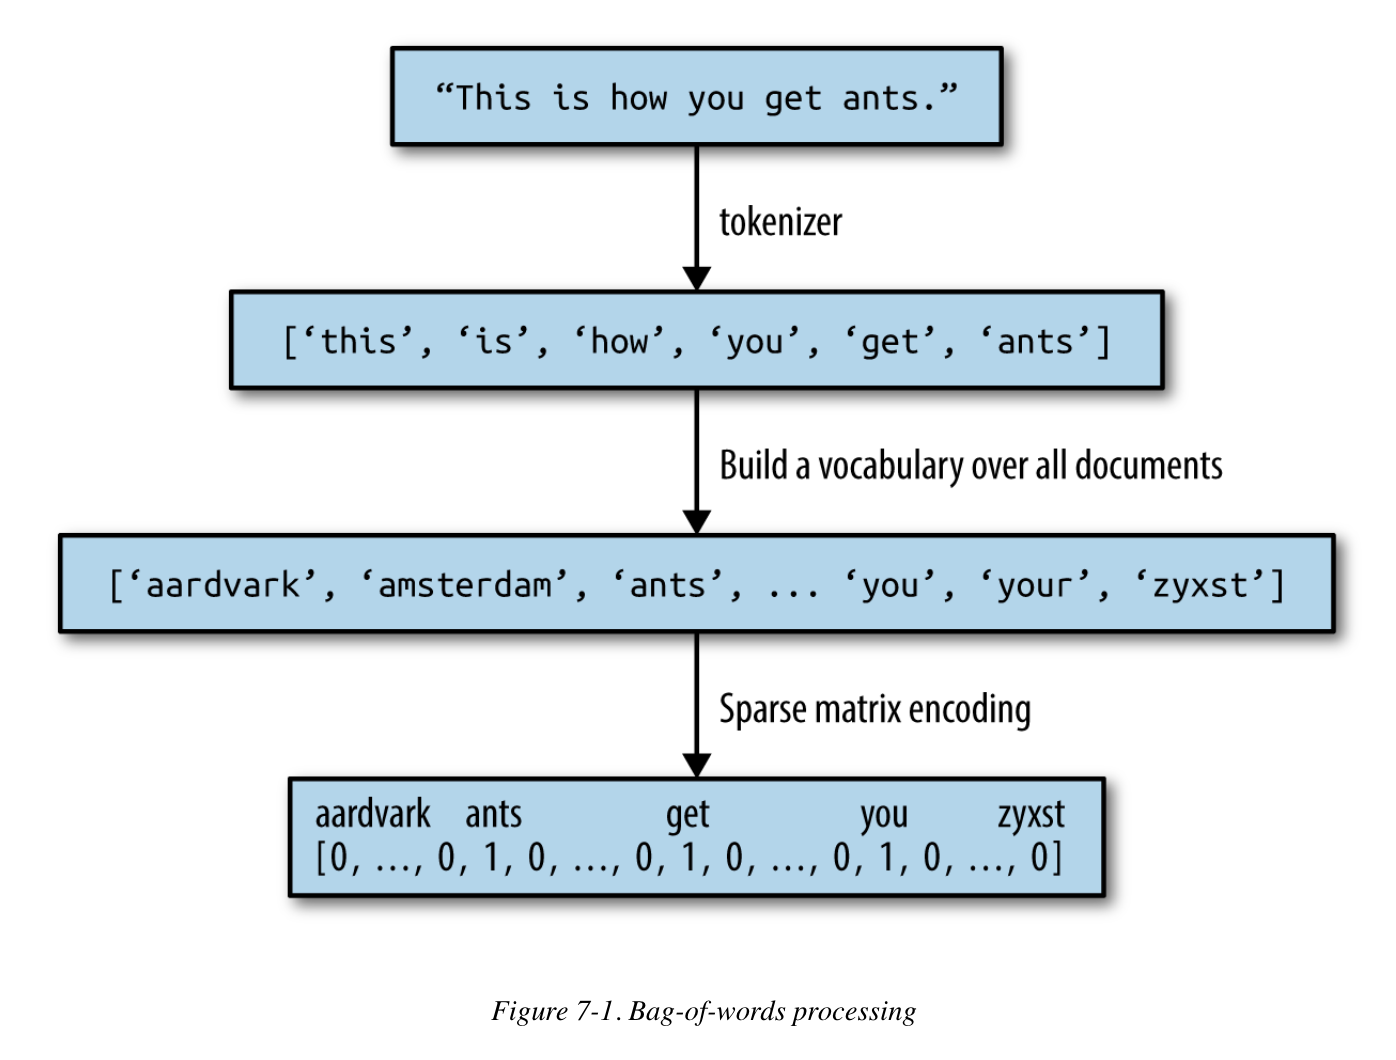

In [6]:
from IPython.display import Image
Image("images/figure_7_1.png")

### Applying Bag-of-Words to a Toy Dataset(Bag-of-Wordsをおもちゃのデータセットに適用する)

bag-of-words表現は、トランスフォーマーであるCountVectorizerに実装されています。  
まず、2つのサンプルで構成されるおもちゃのデータセットに適用して、機能することを確認しましょう。

In [7]:
bards_words = ["The fool doth think he is wise,",
               "but the wise man know himself to be a fool"]

CountVectorizerをインポートしてインスタンス化し、次のようにおもちゃのデータに適合させます。

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

CountVectorizerのフィッティングは、トレーニングデータのトークン化と語彙の構築で構成されます。  
これらはvocabulary_属性としてアクセスできます。

In [9]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 13
Vocabulary content:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'know': 7, 'himself': 5, 'to': 11, 'be': 0}


vocabulary(語彙)は「be」から「wise」までの13語で構成されています。  

トレーニングデータのbag-of-words表現を作成するために、transformメソッドを呼び出します。

In [10]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


bag-of-words表現は、ゼロ以外のエントリのみを格納するSciPyスパース行列に格納されます（第1章を参照）。  
マトリックスは2×13の形状で、2つのデータポイントのそれぞれに1つの行があり、語彙の各単語に1つの特徴があります。  
ほとんどのドキュメントには語彙の単語の小さなサブセットしか含まれていないため、スパース行列が使用されます。  
つまり、特徴配列のほとんどのエントリは0です。  
英語のすべての単語（語彙モデル）と比較して、映画レビューに表示される可能性のあるさまざまな単語の数を考えてください。  
これらすべてのゼロを保存することは法外であり、メモリの浪費になります。  
スパース行列の実際の内容を確認するには、toarrayメソッドを使用して「密な」NumPy配列（すべての0エントリも格納する）に変換できます。$^5$  

> 5: これが可能なのは、13語しか含まれていない小さなおもちゃのデータセットを使用しているためです。実際のデータセットの場合、これによりMemoryErrorが発生します。

In [15]:
print("Dense representation of bag_of_words:\n{}".format(
    bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


各単語の単語数は0または1であることがわかります。  
bards_wordsの2つの文字列のどちらにも、単語が2回含まれていません。  
これらの特徴ベクトルの読み方を見てみましょう。  
最初の文字列（「The fool doth think he is wise,」）はの最初の行として表され、vocabularyの最初の単語「be」がゼロ回含まれています。  
また、vocabularyの2番目の単語「but」がゼロ回含まれています。 3番目の単語「doth」が1回、というように含まれています。  
両方の行を見ると、4番目の単語「fool」、10番目の単語「the」、および13番目の単語「wise」が両方の文字列に表示されていることがわかります。

### Bag-of-Words for Movie Reviews(映画レビューのための言葉の袋)

bag-of-wordsのプロセスを詳細に実行したので、それを映画レビューの感情分析のタスクに適用しましょう。  
以前、IMDbレビューのトレーニングデータとテストデータを文字列のリスト（text_trainとtext_test）にロードしました。  
これを処理します。

In [11]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


トレーニングデータのbag-of-words表現であるX_trainの形状は、25,000×74,849であり、vocabularyに74,849エントリが含まれていることを示しています。  
この場合も、データはSciPyスパース行列として保存されます。  
vocabularyをもう少し詳しく見てみましょう。  
vcabularyにアクセスする別の方法は、vectorizerーのget_feature_nameメソッドを使用することです。  
これは、各エントリが1つの機能に対応する便利なリストを返します。

In [12]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 74849
First 20 features:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
Features 20010 to 20030:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
Every 2000th feature:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


ご覧のとおり、おそらく少し意外なことに、語彙の最初の10エントリはすべて数字です。  
これらの数字はすべてレビューのどこかに表示されるため、単語として抽出されます。  
これらの数字のほとんどは、映画の特定の文脈ではジェームズボンドのキャラクターを指す可能性が高い「007」を除いて、直接的な意味的な意味を持っていません。$^6$  
意味のない「言葉」から意味のあるものを取り除くのは難しい場合があります。  
vocabularyをさらに調べると、「dra」で始まる英語の単語のコレクションが見つかります。  
「draught」、「drawback」、「drawer」の場合、単数形と複数形の両方が別個の単語として語彙に含まれていることに気付くかもしれません。  
これらの単語は非常に密接に関連した意味的意味を持っており、異なる特徴に対応する異なる単語としてそれらを数えることは理想的ではないかもしれません。  

特徴抽出を改善する前に、実際に分類器を作成して、パフォーマンスの定量的測定値を取得しましょう。  
トレーニングラベルはy_trainに格納され、トレーニングデータのbag-of-words表現はX_trainに格納されているため、このデータで分類器をトレーニングできます。  
このような高次元のスパースデータの場合、LogisticRegressionのような線形モデルが最適に機能することがよくあります。  

相互検証を使用してLogisticRegressionを評価することから始めましょう：$^7$  

> 6: データをすばやく分析すると、これが実際に当てはまることが確認されます。自分で確認してみてください。  
7: 注意深い読者は、ここでの前処理との相互検証に関する第6章のレッスンに違反していることに気付くかもしれません。 CountVectorizerのデフォルト設定を使用すると、実際には統計が収集されないため、結果は有効です。アプリケーションには最初からパイプラインを使用する方が適切ですが、公開を容易にするためにパイプラインを延期します。

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Mean cross-validation accuracy: 0.88


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


88％の平均交差検定スコアが得られます。これは、バランスの取れた二項分類タスクの妥当なパフォーマンスを示しています。  
LogisticRegressionには正則化パラメーターCがあり、相互検証を介して調整できることがわかっています。

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Best cross-validation score: 0.89
Best parameters:  {'C': 0.1}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C = 0.1を使用して、89％の交差検定スコアを取得します。  
これで、テストセットでこのパラメータ設定の一般化パフォーマンスを評価できます。

In [15]:
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.88


それでは、単語の抽出を改善できるかどうか見てみましょう。  
CountVectorizerは、正規表現を使用してトークンを抽出します。  
デフォルトでは、使用される正規表現は「\ b \ w \ w + \ b」です。  
正規表現に慣れていない場合、これは、少なくとも2つの文字または数字（\ w）で構成され、単語の境界（\ b）で区切られた文字のすべてのシーケンスを検索することを意味します。  
1文字の単語は検出されず、「does n’t」や「bit.ly」などの短縮形に分割されますが、「h8ter」は1つの単語として一致します。  
次に、CountVectorizerはすべての単語を小文字に変換し、「soon」、「Soon」、および「sOon」がすべて同じトークン（したがって機能）に対応するようにします。  
この単純なメカニズムは実際には非常にうまく機能しますが、前に見たように、多くの有益でない機能（数値など）を取得します。  
これらを削減する1つの方法は、少なくとも2つのドキュメント（または少なくとも5つのドキュメントなど）に表示されるトークンのみを使用することです。  
単一のドキュメントにのみ表示されるトークンは、テストセットに表示される可能性が低いため、役に立ちません。  
min_dfパラメーターを使用して、トークンを表示するために必要なドキュメントの最小数を設定できます。

In [16]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


各トークンの少なくとも5つの出現を要求することにより、前の出力に見られるように、機能の数を27,271に減らすことができます。  
これは、元の機能の約3分の1にすぎません。  
いくつかのトークンをもう一度見てみましょう。

In [17]:
features_names = vect.get_feature_names()

print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02', '020410', '029', '03', '04', '041', '05', '050', '06', '06th', '07', '08', '087', '089', '08th', '09', '0f', '0ne', '0r', '0s', '10', '100', '1000', '1000000', '10000000000000', '1000lb', '1000s', '1001', '100b', '100k', '100m']
Features 20010 to 20030:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
Every 700th feature:
['00', '40s', 'accent', 'aforementioned', 'aloysius', 'annoucing', 'aristocratic', 'attired', 'bainter', 'bayonets', 'bersen', 'blaze', 'bookstores', 'brighton', 'bursting', 'capers', 'cbbc', 'chemstrand', 'clad', 'colin', 'condensing', 'coolidge', 'cray', 'cusp', 'dears', 'dempster', 'dialing', 'dislocated', 'donnacha', 'duch

明らかに数字がはるかに少なく、よりあいまいな単語やスペルミスのいくつかが消えたようです。グリッド検索を再度実行して、モデルのパフォーマンスを確認しましょう。

In [18]:
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Best cross-validation score: 0.89


グリッド検索の最高の検証精度は89％であり、以前と変わりません。  
モデルを改善しませんでしたが、処理する機能が少なくなると処理が高速化され、不要な機能が破棄されるため、モデルがより解釈しやすくなる可能性があります。

**注意**  

トレーニングデータに含まれていなかった単語を含むドキュメントでCountVectorizerの変換メソッドが呼び出された場合、これらの単語は辞書の一部ではないため無視されます。  
トレーニングデータにない単語については何も学習できないため、これは通常、分類の問題ではありません。  
ただし、スパム検出などの一部のアプリケーションでは、特定のドキュメントに含まれるいわゆる「out of vocabulary-語彙外-」の単語の数をエンコードする機能を追加すると役立つ場合があります。  
これは今のところscikit-learnには実装されていませんが、自分で書くのはそれほど難しくありません。  
何らかの方法で語彙を制限する必要があります。  
それ以外の場合、トレーニング中に「out of vocabulary-語彙が不足する-」単語はありません。

## Stopwords

情報量の少ない単語を取り除くもう1つの方法は、頻度が高すぎて情報量が少ない単語を破棄することです。  
主なアプローチは2つあります。  
言語固有のストップワードのリストを使用する方法と、頻繁に出現する単語を破棄する方法です。  
scikit-learnには、feature_extraction.textモジュールに英語のストップワードのリストが組み込まれています。

In [19]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['anyhow', 'wherever', 'been', 'even', 'sometimes', 'hereupon', 'cry', 'mill', 'anywhere', 'your', 'part', 'none', 'it', 'against', 'move', 'me', 'of', 'however', 'then', 'anyway', 'an', 'is', 'below', 'done', 'whether', 'ours', 'six', 'serious', 'above', 'top', 'become', 'behind']


明らかに、リスト内のストップワードを削除すると、リストの長さ（ここでは318）だけ機能の数を減らすことができますが、パフォーマンスの向上につながる可能性があります。  
やるだけやってみよう：

In [20]:
# stop_words = "english"を指定すると、組み込みのリストが使用されます。
# それを増強して、私たち自身を渡すこともできます。
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


現在、データセット内の機能は305（27,271〜26,966）少なくなっています。  
これは、すべてではありませんが、ほとんどのストップワードが表示されたことを意味します。  
グリッド検索をもう一度実行してみましょう。

In [21]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Best cross-validation score: 0.88


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ストップワードを使用すると、グリッド検索のパフォーマンスがわずかに低下しました。  
心配する必要はありませんが、27,000を超える機能から305の機能を除外しても、パフォーマンスや解釈可能性が大きく変わる可能性は低いため、このリストを使用する価値はないようです。  
固定リストは、データ自体からどの単語がストップワードであるかをモデルが判断するのに十分な情報が含まれていない可能性がある小さなデータセットに主に役立ちます。  
演習として、CountVectorizerのmax_dfオプションを設定して、頻繁に出現する単語を破棄する他のアプローチを試して、機能の数とパフォーマンスにどのように影響するかを確認できます。

## Rescaling the Data with tf–idf(tf–idfを使用したデータの再スケーリング)

重要でないと見なされる機能を削除する代わりに、別のアプローチは、機能がどれほど有益であると期待するかによって機能を再スケーリングすることです。  
これを行う最も一般的な方法の1つは、term frequency-inverse document frequency(用語頻度-逆ドキュメント頻度)（tf-idf）メソッドを使用することです。  
この方法の直感は、特定のドキュメントに頻繁に表示されるが、コーパス内の多くのドキュメントには表示されない用語に高い重みを与えることです。  
単語が特定のドキュメントに頻繁に表示されるが、それほど多くのドキュメントには表示されない場合は、そのドキュメントの内容を非常に説明している可能性があります。  
scikit-learnは2つのクラスでTF-IDFメソッドを実装しています。  
TfidfTransformerはCountVectorizerによって生成された疎な行列の出力を受け取り変換するもので、TfidfVectorizerはテキストデータを受け取り、bag-of-word特徴抽出とtf-idf変換の両方を行います。  
tf-idf再スケーリングスキームにはいくつかのバリエーションがあり、ウィキペディアで読むことができます。  
TfidfTransformerクラスとTfidfVectorizerクラスの両方に実装されているドキュメントdの単語wのtf–idfスコアは次の式で与えられます。$^8$  

> 8: ここでは、主に完全を期すためにこの式を提供します。 tf–idfエンコーディングを使用するためにそれを覚えておく必要はありません。

\begin{align*}
tfidf(w, d) = tf * \log\left(\frac{N + 1}{N_w + 1}\right) + 1
\end{align*}

ここで、Nはトレーニングセット内のドキュメントの数、Nwは単語wが出現するトレーニングセット内のドキュメントの数、tf（用語の頻度）は単語wがクエリドキュメントに出現する回数です。  
d（変換またはエンコードするドキュメント）。  
どちらのクラスも、tf–idf表現を計算した後にL2正規化を適用します。  
言い換えると、ユークリッド距離が1.9になるように、各ドキュメントの表現を再スケーリングします。  
この方法で再スケーリングすると、ドキュメントの長さ（単語数）によってベクトル化された表現が変更されなくなります。  

tf–idfは実際にはトレーニングデータの統計プロパティを利用するため、第6章で説明するようにパイプラインを使用して、グリッド検索の結果が有効であることを確認します。  
これにより、次のコードが生成されます。

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import  make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5),
                     LogisticRegression())
pram_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, pram_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Best cross-validation score: 0.89


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


この場合、tf–idfは影響を与えませんでした。  
tf–idfが最も重要だと思った単語を調べることもできます。  
tf-idfスケーリングは、ドキュメントを区別する単語を見つけることを目的としていますが、これは純粋に教師なし手法であることに注意してください。  
したがって、ここでの「important(重要)」は、必ずしも関心のある「positive review」および「nagative review」ラベルに関連しているわけではありません。  
まず、パイプラインからTfidfVectorizerを抽出します。

In [23]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# トレーニングデータセットを変換する
X_train = vectorizer.transform(text_train)
# データセット上の各機能の最大値を見つける
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# 機能名を取得する
feature_names = np.array(vectorizer.get_feature_names())

print("Features with lowest tfidf:\n{}".format(
    feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
    feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
Features with highest tfidf: 
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


tf–idfが低い機能とは、ドキュメント全体で非常に一般的に使用される機能、または控えめにのみ使用され、非常に長いドキュメントでのみ使用される機能です。  
興味深いことに、高tf-idf機能の多くは、実際に特定の番組や映画を識別します。  
これらの用語は、この特定の番組またはフランチャイズのレビューにのみ表示されますが、これらの特定のレビューに頻繁に表示される傾向があります。  
これは、たとえば「zatoichi」、「scanners」、「pokemon」の場合など、非常に明確です。  
これらの言葉は、私たちの感情分類タスクに役立つ可能性は低いですが（一部のフランチャイズが普遍的に肯定的または否定的にレビューされている場合を除く）、レビューに関する特定の情報がたくさん含まれていることは確かです。  

また、逆ドキュメント頻度が低い単語、つまり頻繁に出現するため重要性が低いと見なされる単語も見つけることができます。  
トレーニングセットで見つかった逆ドキュメント頻度値は、idf_属性に格納されます。

In [24]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
    feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


予想通り、これらは主に「the」や「no」のような英語のストップワードです。ただし、「movie」、「film」、「time」、「story」など、映画レビューに明確にドメイン固有のものもあります。  
興味深いことに、「good」、「great」、「bad」も最も頻繁に使用されるため、感情分析タスク(sentiment analysis task)にとって非常に重要であると予想される場合でも、tf-idfメジャーによると「least relevant(関連性が最も低い)」単語です。

## Investigating Model Coefficients(モデル係数の調査)

最後に、ロジスティック回帰モデルが実際にデータから何を学習したかをもう少し詳しく見てみましょう。  
非常に多くの機能があるため（まれな機能を削除した後は27,271）、すべての係数を同時に確認することはできません。  
ただし、最大の係数を調べて、これらがどの単語に対応するかを確認できます。 tf–idf機能に基づいて、トレーニングした最後のモデルを使用します。  

次の棒グラフ（図7-2）は、ロジスティック回帰モデルの最大25個と最小25個の係数(coefficients)を示し、棒は各係数のサイズを示しています。

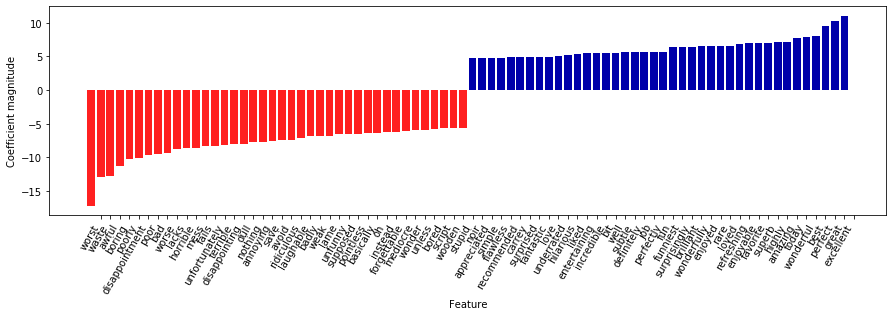

In [25]:
import mglearn
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)

**Figure 7-2. Largest and smallest coefficients of logistic regression trained on tf-idf features**

左側の負の係数は、モデルによると否定的なレビューを示す単語に属し、右側の正の係数は、モデルによると肯定的なレビューを示す単語に属します。  
 ほとんどの用語は、「worst」、「waste」、「disapointment」、「laughable」などの悪い映画評を示し、「excellent」、「wanderful」、「enjoyable」、「refreshing」などの肯定的な映画評を示すように、非常に直感的に理解できるものです。  
 bit」、「job」、「today」など、少しわかりにくい単語もありますが、これらは「goodjob」や「besttoday」などのフレーズの一部である可能性があります。

## Bag-of-Words with More Than One Word (n-Grams)
**複数の単語を含むBag-of-Words（n-Grams**  

bag-of-words表現を使用することの主な欠点の1つは、語順が完全に破棄されることです。  
したがって、「it's bad, not good at all(悪い、まったく良くない)」と「it's good, not bad at all(良い、まったく悪くない)」という2つの文字列は、意味が逆になっていても、まったく同じ表現になります。  
単語の前に「not」を付けることは、文脈が重要である方法の1つの例（極端な場合）にすぎません。  
幸いなことに、単一のtokensの数だけでなく、隣り合って表示されるtokens(トークン)のpairs(ペア)またはtriplets(トリプレット)の数も考慮することにより、bag-of-words表現を使用するときにコンテキストをキャプチャする方法があります。  
トークンのペアはbigrams(バイグラム)と呼ばれ、トークンのトリプレットはtrigrams(トリグラム)と呼ばれ、より一般的にはトークンのsequences(シーケンス)はn-gramsと呼ばれます。  
CountVectorizerまたはTfidfVectorizerのngram_rangeパラメーターを変更することにより、機能と見なされるトークンの範囲を変更できます。  
ngram_rangeパラメーターはタプルであり、考慮されるトークンのシーケンスの最小長と最大長で構成されます  
これは、以前に使用したおもちゃのデータの例です。

In [26]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man know himself to be a fool']


デフォルトでは、トークンのシーケンスごとに、少なくとも1トークン長、最大1トークン長、つまり正確に1トークン長のフィーチャを1つ作成します（単一のトークンはunigrams(ユニグラム)とも呼ばれます）。

In [27]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 13
Vocabulary:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'know', 'man', 'the', 'think', 'to', 'wise']


bigramsのみ、つまり、互いに続く2つのトークンのシーケンスのみを確認するには、ngram_rangeを（2、2）に設定します。

In [28]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 14
Vocabulary:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'know himself', 'man know', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


トークンのより長いシーケンスを使用すると、通常、より多くの機能が得られ、より具体的な機能が得られます。  
bard_wordsの2つのフレーズの間に共通のbiagramsはありません。

In [29]:
print("Transformed data (donse):\n{}".format(
    cv.transform(bards_words).toarray()))

Transformed data (donse):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


ほとんどのアプリケーションでは、トークンの最小数は1にする必要があります。  
これは、1つの単語が多くの意味を表すことが多いためです。  
ほとんどの場合、bigramsバイグラムを追加すると役立ちます。  
より長いシーケンス（最大5-grams）を追加することも役立つ場合がありますが、非常に特殊な機能が多数あるため、これにより機能の数が急増し、過剰適合につながる可能性があります。  
原則として、bigramsの数はunigramsの2乗の数であり、trigramsの数はunigramsの数の3乗であり、非常に大きな特徴空間になります。  
実際には、（英語）言語の構造のため、実際にデータに表示される上位のn-gramの数ははるかに少なくなりますが、それでもまだ多くなります。  

bards_wordsでunigrams、bigrams、trigramsを使用すると、次のようになります。

In [30]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 39
Vocabulary:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'know', 'know himself', 'know himself to', 'man', 'man know', 'man know himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man know']


MDb映画レビューデータでTfidfVectorizerを試して、グリッド検索を使用してn-gram範囲の最適な設定を見つけましょう。

In [31]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# グリッドが比較的大きく、トリグラムが含まれているため、
# グリッド検索の実行には長い時間がかかります。
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
            "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Best cross-validation score: 0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


結果からわかるように、bigramとtrigramの機能を追加することで、パフォーマンスが1パーセント強向上しました。  
第5章で行ったように、相互検証の精度をngram_rangeおよびCパラメータの関数としてヒートマップとして視覚化できます（図7-3を参照）。

In [34]:
import matplotlib.pyplot as plt
# grid_searchからスコアを抽出します
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# ヒートマップを視覚化する
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis",
    fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

**Figure 7-3. Heat map visualization of mean cross-validation accuracy as a function of the parameters ngram_range and C**

ヒートマップから、bigramを使用するとパフォーマンスが大幅に向上するのに対し、trigramを追加しても精度の点で非常に小さなメリットしか得られないことがわかります。  
モデルがどのように改善されたかをよりよく理解するために、unigrams、bigrams、trigramsを含む、最良のモデルの重要な係数を視覚化できます（図7-4を参照）。

In [36]:
# 特徴名と係数を抽出する
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names,
                                    n_top_features=40)

unigramsモデルには存在しなかった「worth(価値がある)」という単語を含む特に興味深い機能があります。  
「not worth(価値がない)」は否定的なレビューを示し、「definitely worth(間違いなく価値がある)」と「well worth(十分に価値がある)」は肯定的なレビューを示します。  
これは、「worth(価値がある)」という言葉の意味に影響を与える文脈の代表的な例です。

次に、trigramsのみを視覚化して、これらの機能が役立つ理由をさらに詳しく説明します。  
有用なbigramsとtrigramsの多くは、「none of the」、「the only good」、「on and on」、「this is one」、「of the most」というフレーズのように、それ自体では有益ではない一般的な単語で構成されています。  
ただし、図7-5に示すように、これらの機能の影響は、unigrams機能の重要性と比較して非常に限られています。

In [37]:
# 3-gramの機能を見つける
mask = np.array([len(feature.split(" ")) for feature in
                feature_names]) == 3
# 3-gramの特徴のみを視覚化する
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                    feature_names[mask],
                                    n_top_features=40)

## Advanced Tokenization, Stemming, and Lemmatization
**高度なトークン化、ステミング、およびレマタイゼーション**  

前述のように、CountVectorizerとTfidfVectorizerでの特徴抽出は比較的単純であり、はるかに複雑な方法が可能です。  
より洗練されたテキスト処理アプリケーションでしばしば改善される1つの特定のステップは、bag-of-wordsモデルの最初のステップであるトークン化です。  
このステップでは、特徴抽出の目的で単語を構成するものを定義します。

「drawback」と「drawbacks」、「drawer」と「drawers」、「drawing」と「drawings」のように、語彙にいくつかの単語の単数形と複数形が含まれることがよくあります。  
bag-of-wordモデルの目的では、「drawback」と「drawbacks」のセマンティクスは非常に近いため、それらを区別すると過剰適合が増加するだけであり、モデルがトレーニングデータを完全に活用することはできません。  
同様に、語彙(vocabulary)には、「replace」、「replaced」、「replacement」、「replaces」、「replaceing」などの単語が含まれていることがわかりました。  
名詞の単数形と複数形を持つのと同様に、異なる動詞の形と関連する単語を別個のトークンとして扱うことは、よく一般化するモデルを構築するのに不利です。

この問題は、同じword stem(語幹)を持つすべての単語を識別する（またはconflarting(混同する)）ことを含む、その語幹を使用して各単語を表すことによって克服できます。  
これが、一般的なsaffixesの削除など、ルールベースのheuristic(ヒューリスティック)を使用して行われる場合、通常、stemmingと呼ばれます。  
代わりに、既知の単語形式の辞書が使用され（明示的で人間が検証したシステム）、文中の単語の役割が考慮される場合、プロセスはlemma(補題)と呼ばれ、補題として単語の標準化された形式が参照されます。  
レンマ化(lemmatization)とstemmingの両方の処理方法は、単語の正規形(normal form)を抽出しようとする正規化(normalization)の形式です。  
正規化のもう1つの興味深いケースは、スペル修正(spelling correction)です。これは実際には役立つ可能性がありますが、この本の範囲外です。

正規化をよりよく理解するために、stemmingの方法（Porter stemmer、広く使用されているヒューリスティックのコレクション（ここではnltkパッケージからインポート））を、spacyパッケージに実装されているレンマ化(lemmatization)と比較してみましょう：$^{10}$  

> 10: インターフェイスの詳細については、nltkおよびspacyのドキュメントを参照してください。ここでは、一般原則にもっと関心があります。

このコードを実行するには、コマンドラインで次のコマンドを実行して、nltkとspacyの両方をインストールする必要があります。

```
conda install -c conda-forge spacy
```

また、実行してspacyの英語サポートをダウンロードする必要があります

```
python -m spacy download en
```

コマンドラインで。 2つのライブラリの次のバージョンを使用しています。

In [40]:
import spacy
print("SpaCy version: {}".format(spacy.__version__))
import sklearn
print("nltk version: {}".format(nltk.__version__))

SpaCy version: 2.3.2
nltk version: 3.4.5


In [45]:
import spacy
import nltk

# spacyの英語モデルをロードする
en_nlp = spacy.load('en')
# nltkのPorter stemmerをインスタンス化する
stemmer = nltk.stem.PorterStemmer()

# spacyのレンマ化とnltkのステミングを比較する関数を定義します
def compare_normalization(doc):
    # spacyでドキュメントをトークン化する
    doc_spacy = en_nlp(doc)
    # spacyが見つけたlemmas(見出語)を印刷する
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    # Porter stemmerが見つけたトークンを印刷する
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

いくつかの違いを示すように設計された文で、レンマ化とポーターステマーを比較します。

In [46]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                     "I'm scared of meeting the clients tommorow.")

Lemmatization:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tommorow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tommorow', '.']


stemmingは常に単語をstem(語幹)にトリミングすることに制限されているため、「was」は「wa」になりますが、lemmatizationは正しい基本動詞形式「be」を取得できます。  
同様に、レンマ化は「wors」を「bad」に正規化できますが、ステミングは「wors」を生成します。  
もう1つの大きな違いは、ステミングによって「meeting」の両方の発生が「meet」に減少することです。  
lemmatizationを使用すると、「meeting」の最初の出現は名詞として認識され、そのままになります。2番目の出現は動詞として認識され、「meet」に還元されます。  
一般に、レンマ化はステミングよりもはるかに複雑なプロセスですが、機械学習のトークンの正規化に使用すると、通常、ステミングよりも優れた結果が得られます。

scikit-learnはどちらの形式の正規化も実装していませんが、CountVectorizerでは、独自のトークナイザーを指定して、tokenizerパラメーターを使用して各ドキュメントをトークンのリストに変換できます。  
spacyからのレンマ化を使用して、文字列を受け取り、レンマのリストを生成する呼び出し可能オブジェクトを作成できます。

In [55]:
# 技術的な問題: CountVectorizerで使用されている
# regexp-basedのトークナイザを使用し、
# spacyのレマタイズのみを使用したいのです。
# そのために、en_nlp.tokenizer (spacy トークン化) 
# をregexp-baseのトークン化に置き換えます。
import re
# CountVectorizerで使用される正規表現
regexp = re.compile('(?u)\\b\\w\\w+\\b')

# Spacy言語モデルをロードする
en_nlp = spacy.load('en', disable=['parser', 'ner'])
old_tokenizer = en_nlp.tokenizer
# トークナイザーを前の正規表現に置き換えます
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
    regexp.findall(string))

# spacyドキュメント処理パイプラインを使用してカスタムトークナイザーを作成する
# （現在、独自のトークナイザーを使用しています）
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# custom_tokenizerでCountVectorizerを定義する
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

データを変換して、語彙のサイズを調べてみましょう。

In [57]:
# lemmatizationでCountVectorizerを使用してtext_trainを変換します
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

# 参照用の標準CountVectorizer
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: [W002] Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  from ipykernel import kernelapp as app


X_train_lemma.shape: (25000, 21825)
X_train.shape: (25000, 27271)


出力からわかるように、レンマ化により、特徴の数が27,271（標準のCountVectorizer処理を使用）から21,825に減少しました。  
Lemmatizationは、特定の機能を圧縮するため、一種の正則化と見なすことができます。  
したがって、データセットが小さい場合、レンマ化によってパフォーマンスが最も向上すると予想されます。  
レンマ化がどのように役立つかを説明するために、StratifiedShuffleSplitを相互検証に使用し、データの1％のみをトレーニングデータとして使用し、残りをテストデータとして使用します。

In [61]:
# トレーニングセットとしてデータの1％のみを使用してグリッド検索を構築する
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
                           train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
# 標準のCountVectorizerを使用してグリッド検索を実行します
grid.fit(X_train, y_train)
print("Best cross-validation score "
     "(standard CountVectorizer): {:.3f}".format(grid.best_score_))

# レンマ化を使用してグリッド検索を実行する
grid.fit(X_train_lemma, y_train)
print("Best cross-validation score"
     "(lemmatization): {:.3f}".format(grid.best_score_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Best cross-validation score (standard CountVectorizer): 0.719


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Best cross-validation score(lemmatization): 0.731


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


この場合、lemmatizationによってパフォーマンスがわずかに向上しました。  
さまざまな特徴抽出手法の多くと同様に、結果はデータセットによって異なります。  
LemmatizationとStemmingは、より良い（または少なくともよりコンパクトな）モデルの構築に役立つ場合があるため、特定のタスクのパフォーマンスの最後のビットを絞り出そうとするときに、これらの手法を試してみることをお勧めします。

## Topic Modeling and Document Clustering

テキストデータによく適用される特定の手法の1つは、トピックモデリングです。  
これは、通常は監督なしで、各ドキュメントを1つまたは複数のトピックに割り当てるタスクを表す総称です。  
この良い例は、「政治(polities)」、「sports(スポーツ)」、「finance(金融)」などのトピックに分類される可能性のあるニュースデータです。  
各ドキュメントに単一のトピックが割り当てられている場合、これは、第3章で説明されているように、ドキュメントをクラスタリングするタスクです。  
各ドキュメントに複数のトピックを含めることができる場合、タスクは第3章の分解方法に関連しています。  
次に、学習する各コンポーネントは1つのトピックに対応し、ドキュメントの表現におけるコンポーネントの係数は、そのドキュメントが特定のトピックにどれほど強く関連しているかを示します。  
多くの場合、人々がトピックモデリングについて話すとき、Latent Dirichelt Allocation(潜在的ディリクレ割り当て)（多くの場合、略してLDA）と呼ばれる1つの特定の分解方法を指します。$^{11}$  

> 11: LDAと略されることも多い別の機械学習モデルがあります。線形判別分析、線形分類モデルです。これはかなりの混乱につながります。この本では、LDAは潜在的ディリクレ割り当てを指します。

### Latent Dirichlet Allocation(潜在的ディリクレの割り当て)

直感的に、LDAモデルは、頻繁に一緒に表示される単語のグループ（トピック）を見つけようとします。  
LDAはまた、各ドキュメントがトピックのサブセットの「mixture(混合物)」として理解できることを要求します。  
機械学習モデルの場合、「トピック」は通常のスピーチでトピックと呼ばれるものではないかもしれませんが、PCAまたはNMF（第3章で説明）によって抽出されたコンポーネントに似ていることを理解することが重要です。これは意味的な意味を持つ場合と持たない場合があります。  
LDAの「トピック」に意味的な意味があるとしても、それは私たちが通常トピックと呼ぶものではないかもしれません。  
ニュース記事の例に戻ると、2人の特定の著者によって書かれた、sports、politics(政治)、およびfinance(金融)に関する記事のコレクションがある場合があります。  
政治の記事では、「gavernor(知事)」、「vote(投票)」、「party」などの単語が表示されることが予想されますが、スポーツの記事では、「team(チーム)」、「score」、「season」などの単語が表示されることがあります。  
これらの各グループの単語は一緒に表示される可能性が高くなりますが、たとえば、「team」と「gavernor(知事)」が一緒に表示される可能性は低くなります。  
ただし、一緒に表示されると予想される単語のグループはこれらだけではありません。 2人の記者は、異なるフレーズまたは異なる単語の選択を好むかもしれません。  
たぶん、そのうちの1人は「demarcate(境界を定める)」という言葉を使うのが好きで、もう1人は「polarize(分極化する)」という言葉が好きです。  
他の「topics(トピック)」は、「レポーターAがよく使用する単語」と「レポーターBがよく使用する単語」ですが、これらは通常の意味でのトピックではありません。

LDAを映画レビューデータセットに適用して、実際にどのように機能するかを見てみましょう。教師なしテキストドキュメントモデルの場合、分析を支配する可能性があるため、非常に一般的な単語を削除することをお勧めします。  
ドキュメントの少なくとも15％に含まれる単語を削除し、上位15％を削除した後に最も一般的な10,000語にbag-of-wordsモデルを制限します。

In [62]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

10個のトピックからなるトピックモデルを学習します。これは、すべてを見ることができるほど少ないものです。  
NMFのコンポーネントと同様に、トピックには固有の順序がなく、トピックの数を変更するとすべてのトピックが変更されます。$^{12}$  
「batch(バッチ)」学習方法を使用します。  
これはデフォルト（「online」）よりも多少遅いですが、通常はより良い結果を提供し、「max_iter」を増やします。  
これにより、より良いモデルが得られる可能性もあります。  

> 12: 実際、NMFとLDAは非常に関連する問題を解決し、NMFを使用してトピックを抽出することもできます。

In [66]:
from sklearn.decomposition import LatentDirichletAllocation

# バージョン0.19で変更：
# n_topicsはn_componentsに名前が変更されました
lda = LatentDirichletAllocation(n_components=10,
                                learning_method="batch",
                                max_iter=25,
                                random_state=0)
# モデルの構築とデータの変換をワンステップで行う
# 変換の計算には時間がかかるので、両方を一度に行うことで時間を節約できる
document_topic = lda.fit_transform(X)

第3章で見た分解方法と同様に、LatentDirichletAllocationには、各トピックに対する各単語の重要度を格納するcomponents_属性があります。 components_のサイズは（n_topics、n_words）です：

In [67]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 10000)


さまざまなトピックの意味をよりよく理解するために、各トピックの最も重要な単語を見ていきます。  
print_topics関数は、これらの機能に適したフォーマットを提供します。

In [70]:
# トピック（components_の行）ごとに、機能を並べ替えます（昇順）
# [：、::-1]を使用して行を反転し、並べ替えを降順にします
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# ベクトル化機能から機能名を取得します
feature_names = np.array(vect.get_feature_names())

In [71]:
# 10のトピックを印刷します。
mglearn.tools.print_topics(topics=range(10),
                          feature_names=feature_names,
                          sorting=sorting,
                          topics_per_chunk=5,
                          n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

重要な言葉から判断すると、トピック1は歴史映画と戦争映画、トピック2は悪いコメディ、トピック3はテレビシリーズに関するもののようです。  
トピック4はいくつかの非常に一般的な言葉を捉えているようですが、トピック6は子供向けの映画に関するもののようであり、トピック8は賞に関連するレビューを捉えているようです。  
データセット内のさまざまな種類のレビューすべてをまとめてカバーできるように、10個のトピックのみを使用して、各トピックを非常に幅広くする必要があります。  

次に、100のトピックで、別のモデルを学習します。より多くのトピックを使用すると、分析がはるかに困難になりますが、トピックがデータの興味深いサブセットに特化できる可能性が高くなります。

In [74]:
lda100 = LatentDirichletAllocation(n_components=100,
                                 learning_method="batch",
                                 max_iter=25,
                                 random_state=0)
document_topics100 = lda100.fit_transform(X)

100のトピックすべてを見るのは少し圧倒されるので、いくつかの興味深い代表的なトピックを選択しました。

In [76]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics,
                          feature_names=feature_names,
                          sorting=sorting,
                          topics_per_chunk=5,
                          n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     
suspense      awful         hitler        gets          young         
horror        boring        nazi          guy           old           
atmosphere    horrible      midnight      around        romantic      
mystery       stupid        joe           down          between       
house         thing         germany       kill          romance       
director      terrible      years         goes          wonderful     
quite         script        history       killed        heart         
bit           nothing       new           going         feel          
de            worse         modesty       house         year          
performances  waste         cowboy        away          each          
dark          pretty        jewish        head          french        
twist 

今回抽出したトピックはより具体的であるように思われますが、多くは解釈が困難です。  
トピック7は、ホラー映画とスリラーに関するもののようです。トピック16と54は悪いレビューをキャプチャしているようですが、トピック63は主にコメディの肯定的なレビューをキャプチャしているようです。  
発見されたトピックを使用してさらに推論したい場合は、これらのトピックに割り当てられているドキュメントを見て、各トピックの最高ランクの単語を見て得た直感を確認する必要があります。  
たとえば、トピック45は音楽に関するもののようです。このトピックに割り当てられているレビューの種類を確認しましょう。

In [79]:
# 「music」トピック45の重みで並べ替え
music = np.argsort(document_topics100[:, 45])[::-1]
# トピックが最も重要な5つのドキュメントを印刷します
for i in music[:10]:
    # 最初の2つの文を表示する
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

ご覧のとおり、このトピックでは、ミュージカルから伝記映画、前回のレビューで特定が難しいジャンルまで、音楽を中心としたさまざまなレビューを取り上げています。  
トピックを検査するもう1つの興味深い方法は、すべてのレビューのdocument_topicsを合計することにより、各トピックが全体的にどの程度の重みを持っているかを確認することです。  
各トピックには、最も一般的な2つの単語で名前を付けます。図7-6は、学習したトピックの重みを示しています。

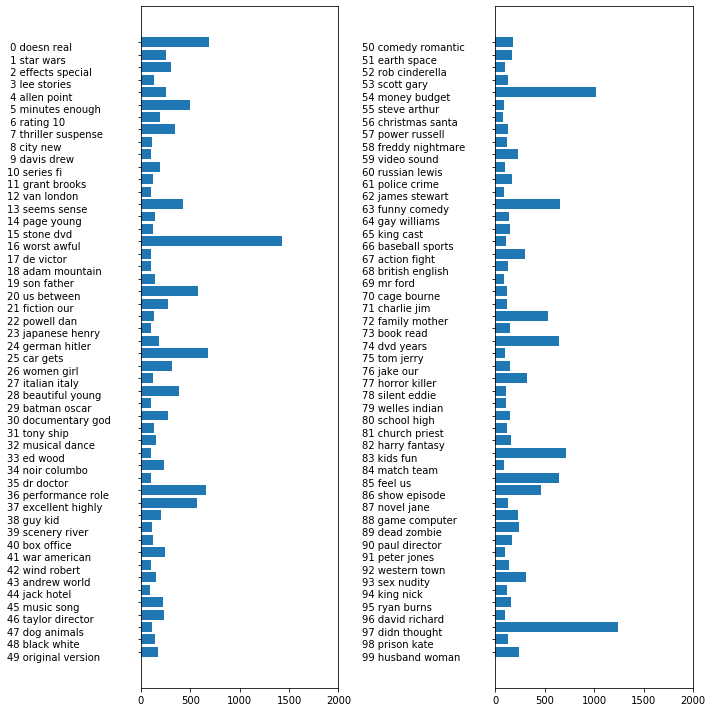

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
              for i, words in enumerate(feature_names[sorting[:, :2]])]

# 2列の棒グラフ：
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)
                [start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end],
                           ha="left",
                           va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

**Figure 7-6. Topic weights learned by LDA**

最も重要なトピックは70で、これは否定的な感情に対応しているようです。  
16、13、58、ストップワードが含まれているようです。  
86は、肯定的なレビューに関連付けられています。  
86の「10」は、コメントに記載されている10点満点中10点に対応している可能性があります。これらのメイントピックの後には、8、38、40、44、76、82、84などのジャンル固有のトピックが続きます。

LDAは、いくつかの非特定のトピックに加えて、ジャンル固有と評価固有の2種類のトピックをほとんど発見したようです。  
ほとんどのレビューは、映画固有のコメントと、評価を正当化または強調するコメントで構成されているため、これは興味深い発見です。

LDAのようなトピックモデルは、ラベルがない場合、またはここにあるように、ラベルが利用できる場合でも、大きなテキストコーパスを理解するための興味深い方法です。  
ただし、LDAアルゴリズムはランダム化されており、random_stateパラメーターを変更するとまったく異なる結果になる可能性があります。  
トピックを特定することは役立つ場合がありますが、教師なしモデルから導き出す結論は、一粒の塩でとらえる必要があります。  
特定のトピックのドキュメントを見て、直感を確認することをお勧めします。  
LDA.transformメソッドによって生成されたトピックは、教師あり学習のコンパクトな表現として使用できる場合もあります。  
これは、トレーニングの例がほとんどない場合に特に役立ちます。

## Summary and Outlook

この章では、映画のレビューを分類するアプリケーションの例を使用して、自然言語処理（NLP）とも呼ばれるテキスト処理の基本について説明しました。  
ここで説明するツールは、テキストデータを処理する際の優れた出発点として役立つはずです。  
特に、スパムや詐欺の検出や感情分析などのテキスト分類タスクの場合、bag-of-words表現はシンプルで強力なソリューションを提供します。  
機械学習でよくあることですが、NLPアプリケーションではデータの表現が重要であり、抽出されたトークンとn-gramを調べることで、モデリングプロセスに関する強力な洞察を得ることができます。  
テキスト処理アプリケーションでは、この章で見たように、教師ありタスクと教師なしタスクの両方について、意味のある方法でモデルを内省することがしばしば可能です。  
実際にNLPベースの方法を使用する場合は、この機能を最大限に活用する必要があります。

自然言語とテキスト処理は大きな研究分野であり、高度な方法の詳細について説明することは、この本の範囲をはるかに超えています。  
詳細については、Steven Bird、Ewan Klein、Edward LoperによるO’Reillyの本Natural Language Processing with Pythonをお勧めします。この本では、NLPの概要とNLP用のnltkPythonパッケージの概要を説明しています。  
もう1つの優れた、より概念的な本は、Christopher Manning、Prabhakar Raghavan、およびHinrichSchützeによる標準リファレンスIntroduction to Information Retrievalであり、情報検索、NLP、および機械学習の基本的なアルゴリズムについて説明しています。  
どちらの本にも、無料でアクセスできるオンライン版があります。  
前に説明したように、CountVectorizerクラスとTfidfVectorizerクラスは、比較的単純なテキスト処理メソッドのみを実装します。  
より高度なテキスト処理方法については、Pythonパッケージspacy（比較的新しいが、非常に効率的で適切に設計されたパッケージ）、nltk（非常に確立され、完全であるがやや古いライブラリ）、およびgensim（NLPパッケージとトピックモデリングに重点を置いています）。

近年、テキスト処理には非常にエキサイティングな新しい開発がいくつかありますが、これらはこの本の範囲外であり、ニューラルネットワークに関連しています。  
1つ目は、word2vecライブラリに実装されている、単語ベクトルまたは分散単語表現とも呼ばれる連続ベクトル表現の使用です。  
ThomasMikolov他によるオリジナルの論文「単語とフレーズの分散表現とそれらの構成性」。主題への素晴らしい入門書です。 spacyとgensimはどちらも、このホワイトペーパーとそのフォローアップで説明する手法の機能を提供します。

近年勢いを増しているNLPのもう1つの方向は、テキスト処理にリカレントニューラルネットワーク（RNN）を使用することです。  
RNNは、クラスラベルのみを割り当てることができる分類モデルとは対照的に、再びテキストである出力を生成できる特に強力なタイプのニューラルネットワークです。  
テキストを出力として生成する機能により、RNNは自動翻訳と要約に非常に適しています。  
このトピックの概要は、Ilya Suskever、Oriol Vinyals、QuocLeによる比較的技術的な論文「SequencetoSequence Learning withNeuralNetworks」にあります。  
TensorFlowフレームワークを使用したより実用的なチュートリアルは、TensorFlowWebサイトにあります。